In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.feature as cf
import cartopy.crs as ccrs

In [2]:
data = xr.open_dataset('chirps_21_WA_new.nc')
data

<xarray.Dataset>
Dimensions:    (time: 14975, longitude: 140, latitude: 80)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2021-12-31
  * longitude  (longitude) float32 -19.88 -19.62 -19.38 ... 14.38 14.62 14.88
  * latitude   (latitude) float32 0.125 0.375 0.625 0.875 ... 19.38 19.62 19.88
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Thu Jun 09 17:26:34 2022: cdo sellonlatbox,-20,15,0,20...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [3]:
rr = data.precip

In [4]:
seas_precip = rr.groupby('time.season').mean('time')
seas_precip

<xarray.DataArray 'precip' (season: 4, latitude: 80, longitude: 140)>
array([[[          nan,           nan,           nan, ...,
         3.7832508e+00, 3.8176348e+00, 3.8406610e+00],
        [          nan,           nan,           nan, ...,
         3.8150592e+00, 4.0350819e+00, 4.0716138e+00],
        [          nan,           nan,           nan, ...,
         3.7015040e+00, 3.8129406e+00, 3.7631147e+00],
        ...,
        [          nan,           nan,           nan, ...,
         6.4923591e-04, 5.8865355e-04, 3.8976112e-04],
        [          nan,           nan,           nan, ...,
         8.1905950e-04, 9.7274099e-04, 8.3873648e-04],
        [          nan,           nan,           nan, ...,
         1.2277396e-03, 1.4576494e-03, 1.5736741e-03]],

       [[          nan,           nan,           nan, ...,
         1.3933636e+00, 1.4316349e+00, 1.6214828e+00],
        [          nan,           nan,           nan, ...,
         1.6268820e+00, 1.5972340e+00, 1.7397947e+00],
        [          nan,           nan,           nan, ...,
         1.7879282e+00, 1.8293660e+00, 2.0294588e+00],
...
        [          nan,           nan,           nan, ...,
         1.6933896e-03, 2.2645553e-03, 2.1674722e-03],
        [          nan,           nan,           nan, ...,
         2.1343946e-03, 3.3517873e-03, 5.9649427e-03],
        [          nan,           nan,           nan, ...,
         5.4024132e-03, 7.8624710e-03, 8.6865388e-03]],

       [[          nan,           nan,           nan, ...,
         6.5663671e+00, 6.7622662e+00, 6.9084587e+00],
        [          nan,           nan,           nan, ...,
         6.8697701e+00, 7.2828116e+00, 7.3703289e+00],
        [          nan,           nan,           nan, ...,
         7.1561193e+00, 7.0751181e+00, 6.8835940e+00],
        ...,
        [          nan,           nan,           nan, ...,
         8.0023217e-04, 1.0839399e-03, 9.1870251e-04],
        [          nan,           nan,           nan, ...,
         1.8807286e-03, 2.2008000e-03, 1.8264340e-03],
        [          nan,           nan,           nan, ...,
         2.2402755e-03, 2.1106526e-03, 2.1428620e-03]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -19.88 -19.62 -19.38 ... 14.38 14.62 14.88
  * latitude   (latitude) float32 0.125 0.375 0.625 0.875 ... 19.38 19.62 19.88
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

C:\Users\Theophilus Bassaw\AppData\Local\Temp\ipykernel_8364\3444927219.py:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inhes" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('project plots/seasonal distribution.png', bbox_inhes='tight', dpi=500)


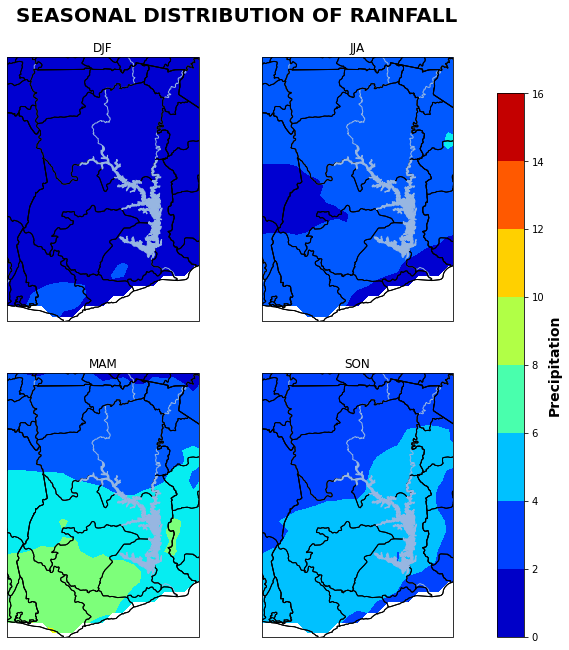

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

seasons = ['DJF', 'JJA', 'MAM', 'SON']
for i, season in enumerate(seasons):
    ax[i].add_feature(cf.COASTLINE, zorder=2)
    ax[i].add_feature(cf.BORDERS, zorder=2)
    ax[i].add_feature(cf.RIVERS, zorder=2)
    ax[i].add_feature(cf.STATES, zorder=2)
    ax[i].add_feature(cf.LAKES, zorder=2)
    ax[i].set_extent([-3.5, 1.25, 4.76, 11.3])
    ax[i].set_title(season)
    cb = ax[i].contourf(seas_precip.longitude, seas_precip.latitude, seas_precip[i], transform=ccrs.PlateCarree(),cmap='jet')

# Add color bar
color_bar = fig.colorbar(cb, ax=ax.ravel().tolist(), orientation='vertical', fraction=0.05, pad=0.04)
color_bar.set_label('Precipitation',fontweight='bold',fontsize=14)

plt.suptitle('SEASONAL DISTRIBUTION OF RAINFALL',fontweight='bold',fontsize=20,y = 1)

plt.subplots_adjust(wspace=0.1, top=0.93, right = 0.8) 
fig.savefig('project plots/seasonal distribution.png', bbox_inhes='tight', dpi=500)

In [6]:
month_clim = rr.groupby('time.month').mean('time')

C:\Users\Theophilus Bassaw\AppData\Local\Temp\ipykernel_8364\3363767652.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inhes" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('project plots/Monhly distribution.png', bbox_inhes='tight', dpi=500)


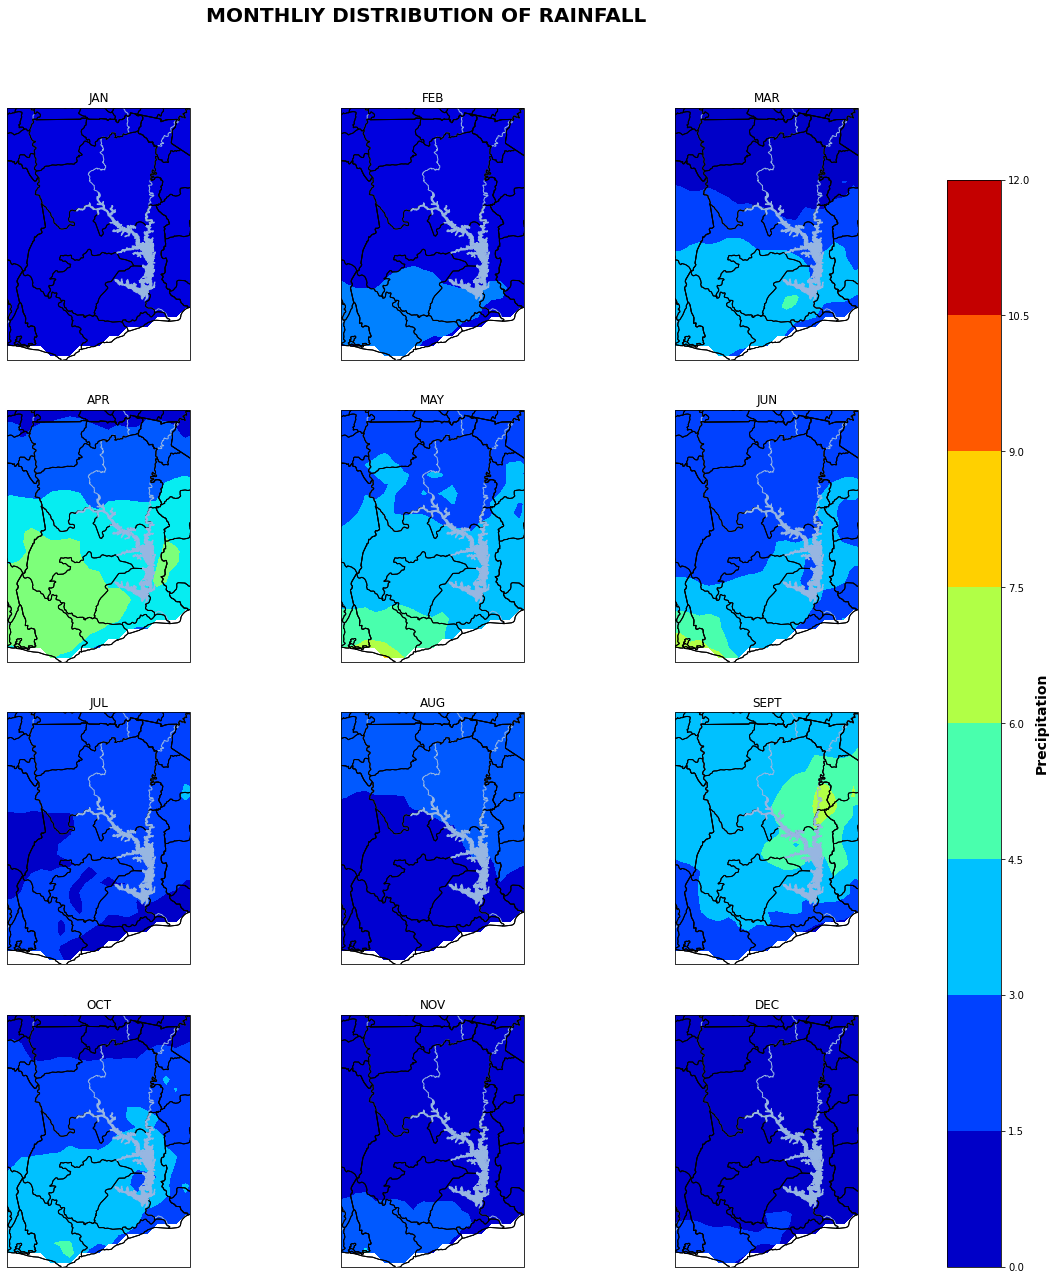

In [26]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

months = ['JAN', 'FEB', 'MAR', 'APR','MAY','JUN','JUL','AUG','SEPT','OCT','NOV','DEC']
for i, season in enumerate(months):
    ax[i].add_feature(cf.COASTLINE, zorder=2)
    ax[i].add_feature(cf.BORDERS, zorder=2)
    ax[i].add_feature(cf.RIVERS, zorder=2)
    ax[i].add_feature(cf.STATES, zorder=2)
    ax[i].add_feature(cf.LAKES, zorder=2)
    ax[i].set_extent([-3.5, 1.25, 4.76, 11.3])
    ax[i].set_title(season)
    cb = ax[i].contourf(month_clim.longitude, month_clim.latitude, month_clim[i], transform=ccrs.PlateCarree(),cmap='jet')

# Add color bar
color_bar = fig.colorbar(cb, ax=ax.ravel().tolist(), orientation='vertical', fraction=0.05, pad=0.04)
color_bar.set_label('Precipitation',fontweight='bold',fontsize=14)

plt.subplots_adjust(wspace=0.1, top=0.93, right = 0.8) 
plt.suptitle('MONTHLIY DISTRIBUTION OF RAINFALL',fontweight='bold',fontsize=20,y=1)
fig.savefig('project plots/Monhly distribution.png', bbox_inhes='tight', dpi=500)

In [11]:
''''
precip = data['precip']
time = data['time']

# Convert time to a more usable format (e.g., pandas datetime)
time = pd.to_datetime(time.values)

# Add the time as a coordinate to the precip DataArray
precip.coords['time'] = time

# Aggregate the spatial dimensions (e.g., latitude and longitude) to get a time series of average precipitation
# Assuming the spatial dimensions are named 'lat' and 'lon', adjust if necessary
daily_precip = precip.mean(dim=['latitude', 'longitude'])

# Calculate cumulative rainfall over a rolling window
cumulative_rainfall = daily_precip.rolling(time=3, center=False).sum()

# Define a threshold for onset and cessation (e.g., 20 mm over 3 consecutive days)
onset_threshold = 20  # mm

# Find the first day where cumulative rainfall exceeds the threshold for onset
onset = cumulative_rainfall.where(cumulative_rainfall > onset_threshold, drop=True).time.min().values
cessation = cumulative_rainfall.where(cumulative_rainfall > onset_threshold, drop=True).time.max().values

# Plotting daily precipitation
plt.figure(figsize=(14, 8))
plt.plot(daily_precip.time, daily_precip, label='Daily Precipitation')

# Marking onset and cessation
plt.axvline(x=pd.to_datetime(onset), color='g', linestyle='--', label=f'Onset (Day {pd.to_datetime(onset).strftime("%Y-%m-%d")})')
plt.axvline(x=pd.to_datetime(cessation), color='r', linestyle='--', label=f'Cessation (Day {pd.to_datetime(cessation).strftime("%Y-%m-%d")})')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Onset and Cessation of Rainfall')
plt.legend()


SyntaxError: EOF while scanning triple-quoted string literal (1157936761.py, line 37)

In [9]:
bono_region_data = dataset.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))


NameError: name 'dataset' is not defined